In [1]:
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
import tensorflow as tf
import pylab
import matplotlib.pyplot as plt
import time
import sys

/Users/stebliankin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Import path to working directory
workdir="/Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark"
sys.path.append(workdir)

In [3]:
# Import local functions:
import utils_MNIST
import image_op
import conv_net

In [4]:
# Download MNIST data using utils_MNIST
# MNIST dataset: http://yann.lecun.com/exdb/mnist/
# Contains 60,000 training examples of hand written digits

# Downloading MNIST data using API from stanford-tensorflow-tutorial:
# https://github.com/chiphuyen/stanford-tensorflow-tutorials/blob/master/examples/utils.py
os.mkdir(workdir+"/data")
utils_MNIST.download_mnist(workdir+"/data"+"/mnist")



Successfully downloaded /Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded /Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded /Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded /Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
# Make subclass of Mnist Convolutional Neural Network
# Architecture of the network is specified in conv_net.py

class MnistConvNet(conv_net.ConvNet):
    def __init__(self, checkpoint_path, graph_path):
        super().__init__(checkpoint_path, graph_path)
        self.training_folder = "data/mnist"
        self.desired_shape = 28
        self.dataset_size = 60000

        self.n_classes = 10
        self.skip_step = 1  # printing rate

    def get_data(self):
        with tf.name_scope("mnist_data"):
            train_data, test_data = utils_MNIST.get_mnist_dataset(self.batch_size)
            iterator = tf.data.Iterator.from_structure(train_data.output_types, train_data.output_shapes)
            img, self.label = iterator.get_next()
            self.img = tf.reshape(img, shape=[-1, 28, 28, 1])
            self.train_init = iterator.make_initializer(train_data)
            self.test_init = iterator.make_initializer(test_data)

    def predict(self, tensor):
        # input: tensor of images to predict with shape = (number of images, img width, img height)
        # output: list of predicted classes
        self.get_predict_data(tensor)
        self.inference()

        
        with tf.Session() as sess:
            sess.run(self.iter)
            print('Running session')
            sess.run(tf.global_variables_initializer())
            print('Variables initialized')
            saver = tf.train.Saver()
            ckpt = tf.train.get_checkpoint_state(os.path.dirname(self.checkpoint_path))
            print(self.checkpoint_path)
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)
                print("Restored")
            # sess.run(self.img)
            # print(sess.run(self.img))
            lbl_predicted = []
            try:
                while True:
                    prediction = sess.run(self.logits)
                    lbl = np.argmax(prediction)
                    lbl_predicted.append(lbl)
            except tf.errors.OutOfRangeError:
                pass
        return lbl_predicted

In [6]:
checkpoint_path = "/Users/stebliankin/Desktop/Data\ Science-CAP5768/project/checkpoints"
graph_path = "/Users/stebliankin/Desktop/Data\ Science-CAP5768/project/graphs/convnet_layers"

start = time.time()
print('start program')
model = MnistConvNet(checkpoint_path, graph_path)
print('building a model')
model.build()
print('training')
model.train(n_epochs=1)
print("Done. Running time is {} min.".format((time.time() - start)/60))

start program
building a model
data/mnist/train-images-idx3-ubyte.gz already exists
data/mnist/train-labels-idx1-ubyte.gz already exists
data/mnist/t10k-images-idx3-ubyte.gz already exists
data/mnist/t10k-labels-idx1-ubyte.gz already exists
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

INFO:tensorflow:Summary name histogram loss is illegal; using histogram_loss instead.
training
Running session
Variables initialized
start training
Loss at step 0: 2.335343837738037
Loss at step 1: 2.2867650985717773
Loss at step 2: 2.250821590423584
Loss at step 3: 2.134920597076416
Loss at step 4: 2.148805618286133
Loss at step 5: 2.0092580318450928
Loss at step 6: 1.9374186992645264
Loss at step 7: 1.7557470798492432
Loss at step 8: 1.621293544769287
Loss at step 9: 1.4235073328018188
Loss at step 10: 1.5779443979263306
Loss at step 11: 1.257464051246643
Loss a

Loss at step 200: 0.18241411447525024
Loss at step 201: 0.121017225086689
Loss at step 202: 0.10017992556095123
Loss at step 203: 0.17698387801647186
Loss at step 204: 0.050434660166502
Loss at step 205: 0.1099405586719513
Loss at step 206: 0.14904865622520447
Loss at step 207: 0.09740850329399109
Loss at step 208: 0.16822540760040283
Loss at step 209: 0.14795517921447754
Loss at step 210: 0.09608125686645508
Loss at step 211: 0.109884113073349
Loss at step 212: 0.1545417606830597
Loss at step 213: 0.08243916928768158
Loss at step 214: 0.15706458687782288
Loss at step 215: 0.1882478892803192
Loss at step 216: 0.1144958883523941
Loss at step 217: 0.17310678958892822
Loss at step 218: 0.04093868285417557
Loss at step 219: 0.12805935740470886
Loss at step 220: 0.11180144548416138
Loss at step 221: 0.04774989187717438
Loss at step 222: 0.15681061148643494
Loss at step 223: 0.11932819336652756
Loss at step 224: 0.10884561389684677
Loss at step 225: 0.09777415543794632
Loss at step 226: 0.14

Loss at step 417: 0.13885951042175293
Loss at step 418: 0.021618876606225967
Loss at step 419: 0.12493588030338287
Loss at step 420: 0.05702697113156319
Loss at step 421: 0.06359478831291199
Loss at step 422: 0.12018800526857376
Loss at step 423: 0.09092971682548523
Loss at step 424: 0.054362621158361435
Loss at step 425: 0.1883111298084259
Loss at step 426: 0.0825338214635849
Loss at step 427: 0.07561798393726349
Loss at step 428: 0.10615081340074539
Loss at step 429: 0.0836435854434967
Average loss at epoch 0: 0.2374029874715001
Took: 73.49485468069712 minutes
Accuracy at epoch 0: 0.9784414556962026 
Took: 5.125434875488281 seconds
Done. Running time is 73.72614098389944 min.


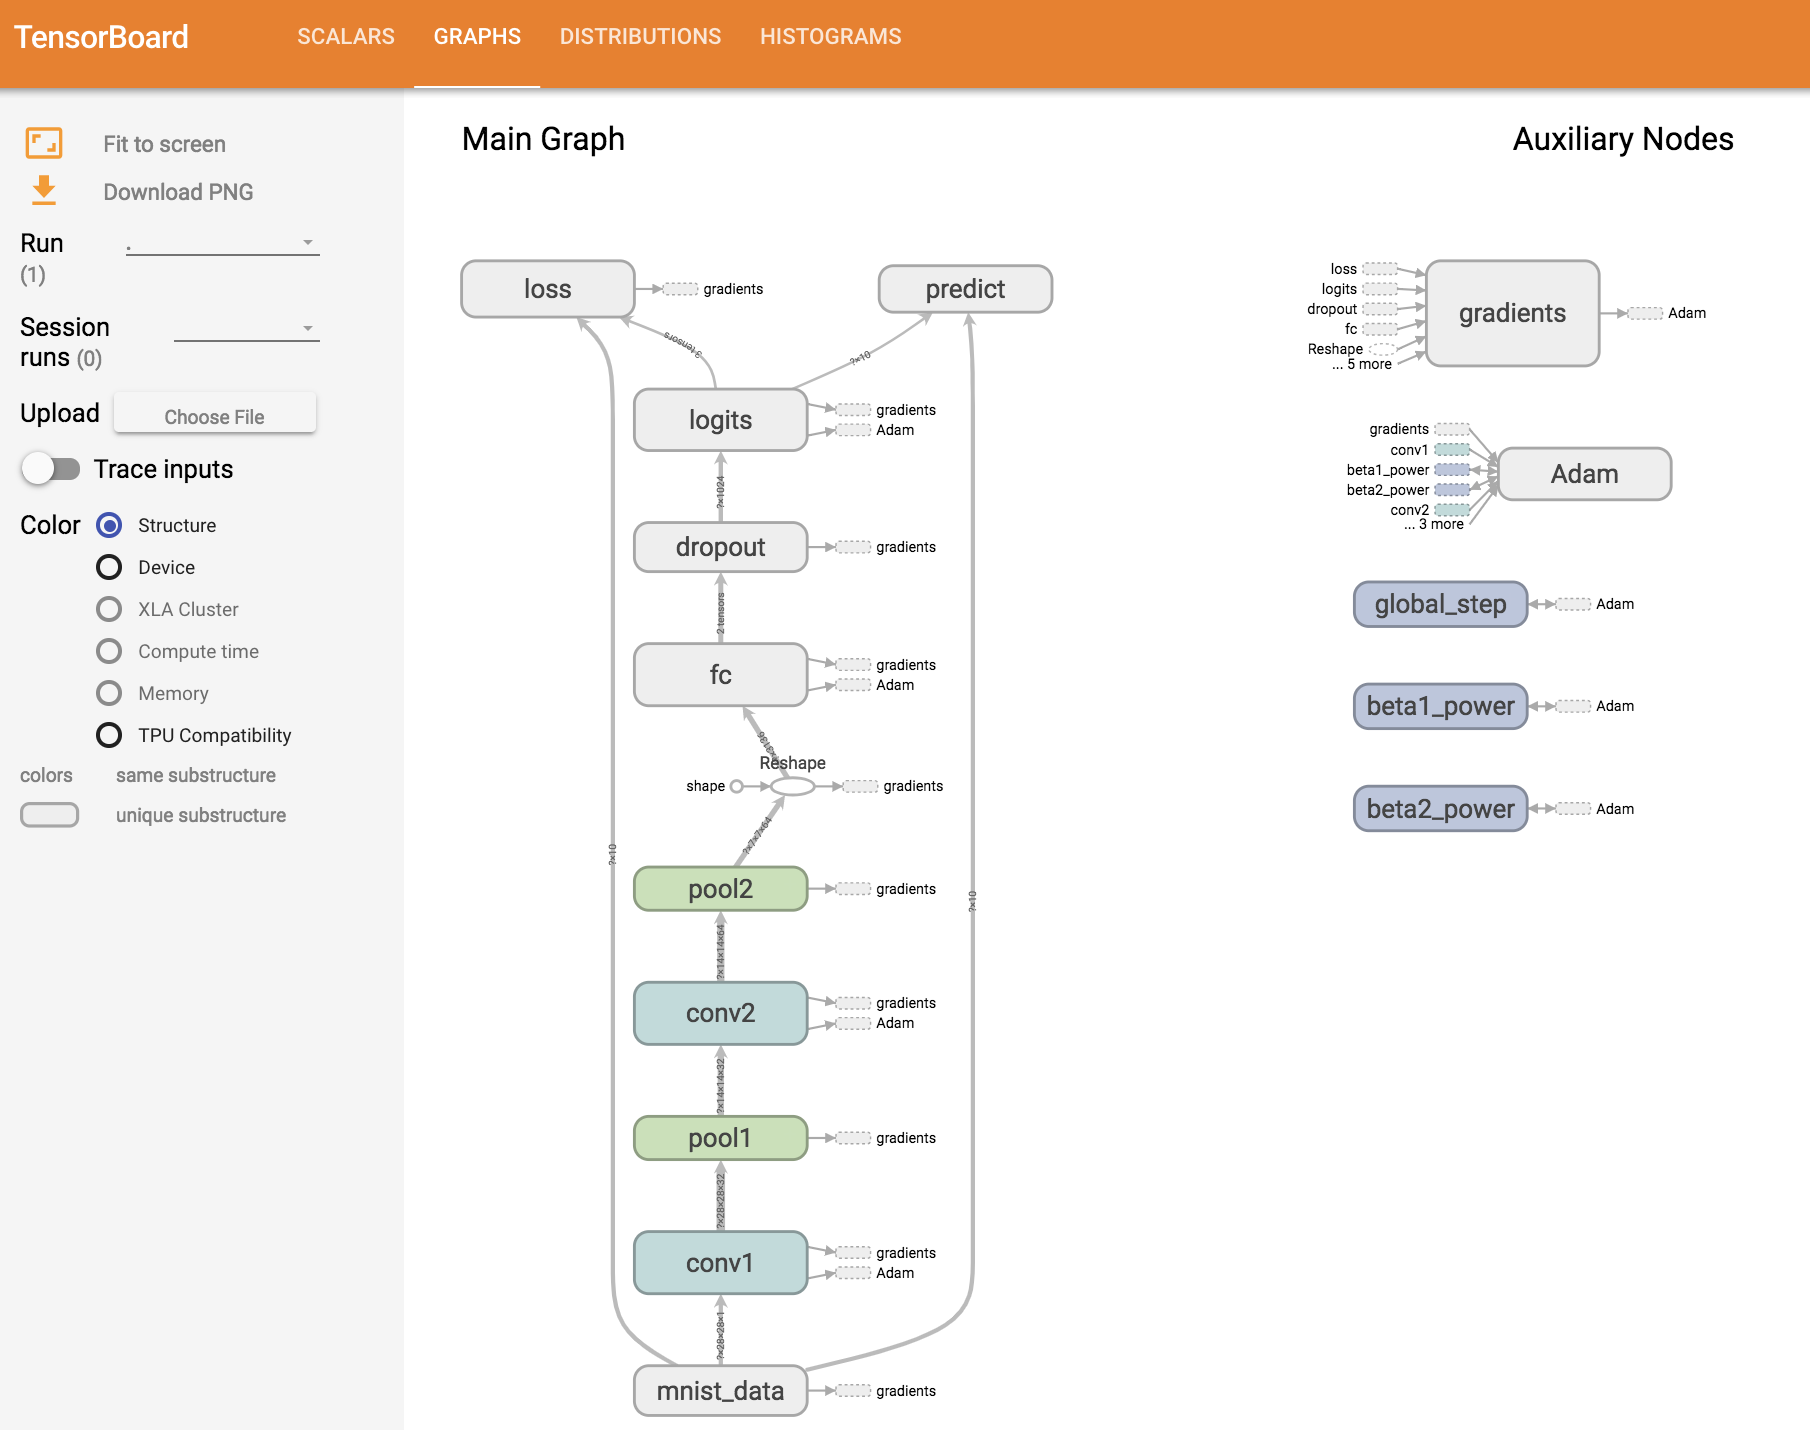

In [7]:
# Visualizing tensorboard

# Steps for visualizing tensorboard
# 1) You need to run tensorboard in terminal. Example:
    # Vitaliis-MacBook-Pro:~ stebliankin$ tensorboard --logdir=/Users/stebliankin/Desktop/Data\ Science-CAP5768/project/graphs/convnet_layers
    # /Users/stebliankin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
    #   from ._conv import register_converters as _register_converters
    # 2018-11-08 16:27:19.408561: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
    # TensorBoard 1.7.0 at http://Vitaliis-MacBook-Pro.local:6006 (Press CTRL+C to quit)
# 2) You need to make a screen shots of the model

# Show the main graph:
from IPython.display import Image
Image(workdir + "/MNIST_testing/model.png")
    

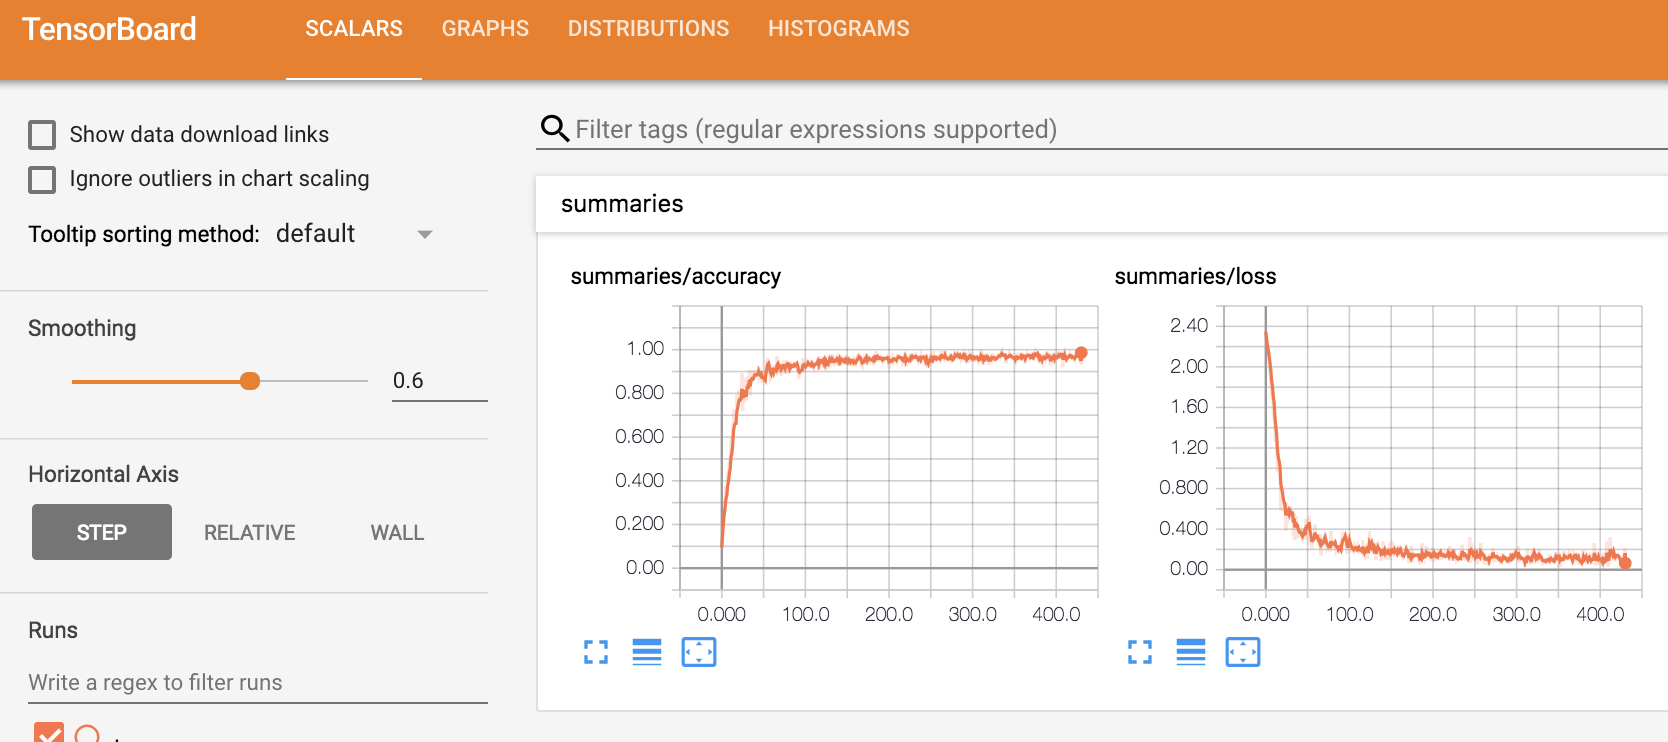

In [8]:
# Show summaries:
Image(workdir + "/MNIST_testing/summaries.png")


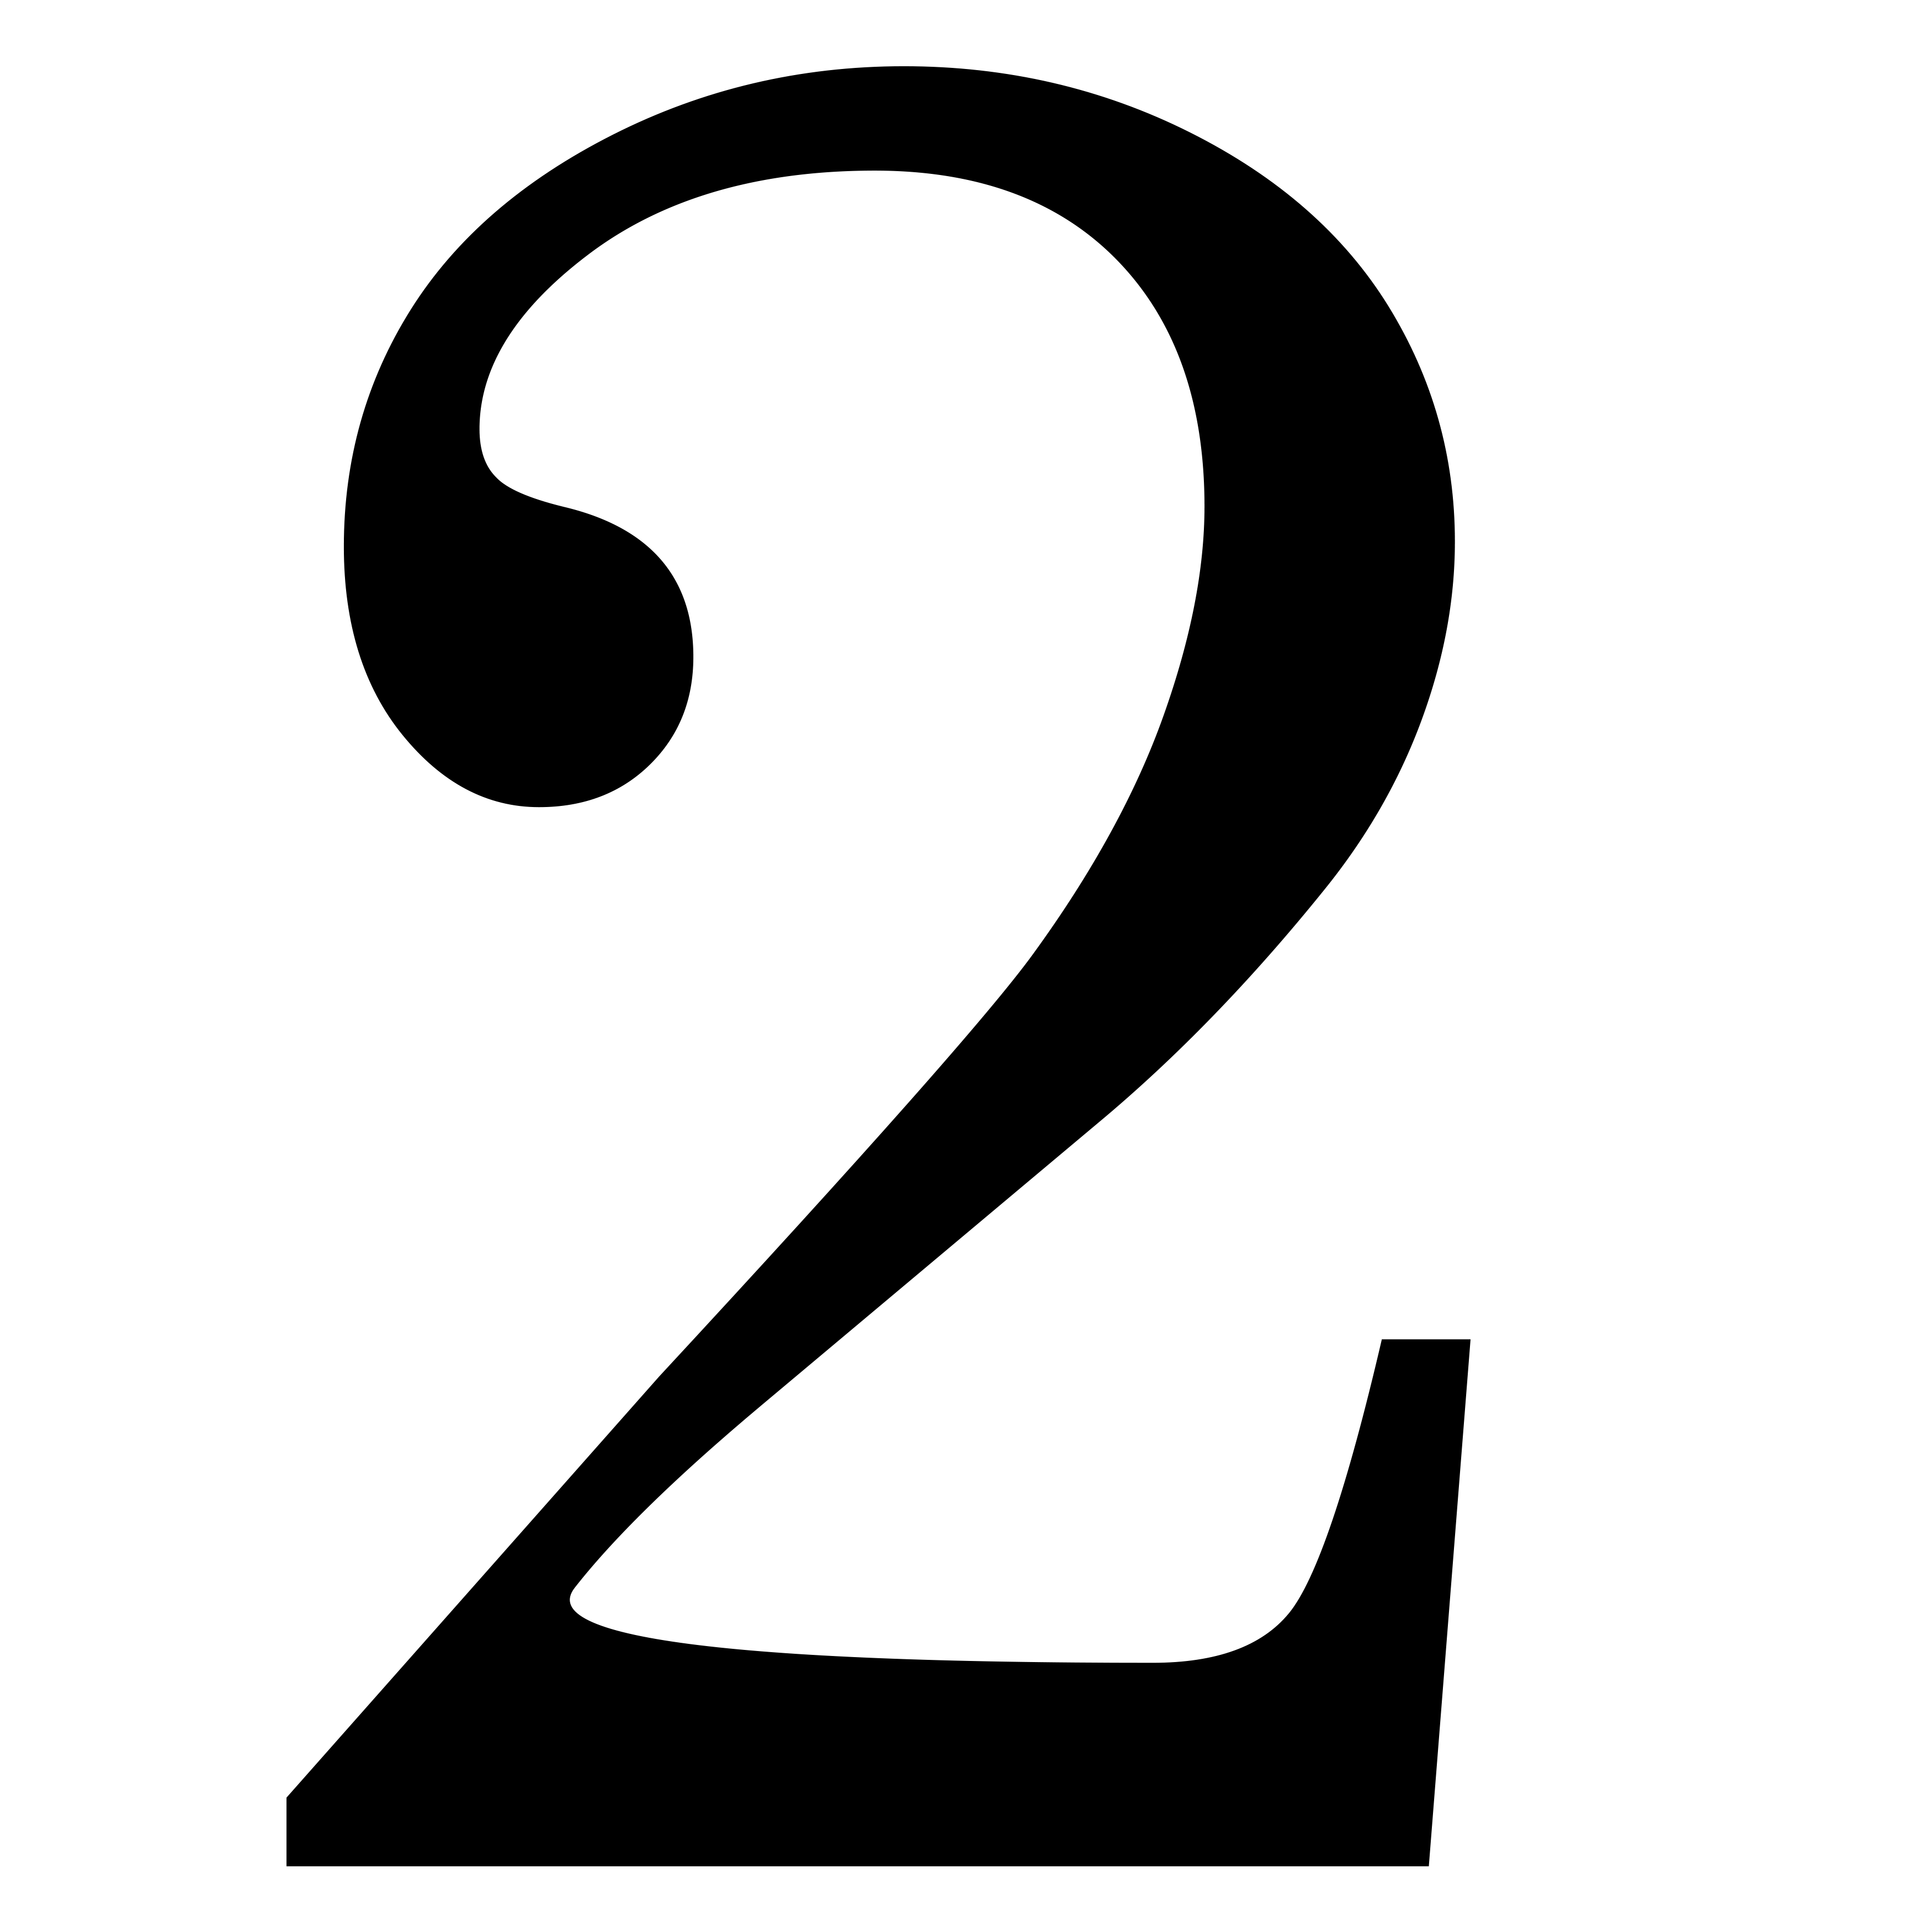

In [9]:
# The model is ready
# Testing the model on a new data

# Creating the handwritten image
Image(workdir + "/MNIST_testing/2.png")


In [10]:
# Read pixels of image:
import cv2
img = cv2.imread(workdir+"/MNIST_testing/2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
img = img.reshape([1,28,28])
# tf_image = tf.image.decode_png(workdir+"/MNIST_testing/9.png", channels=1)
# image_float = tf.image.convert_image_dtype(tf_image, tf.float32)
# image_float = tf.reshape(image_float, shape = [-1, 28, 28, 1])
# image_float = tf.cast(image_float, tf.float32)
tensor = tf.data.Dataset.from_tensor_slices(img)
#tensor = tf.reshape(tensor, shape=[1,28,28,])


In [11]:
checkpoint_path = "/Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/checkpoints/conv_layers-430"
graph_path = "/Users/stebliankin/Desktop/Data\ Science-CAP5768/project/graphs/convnet_layers"

model = MnistConvNet(checkpoint_path=checkpoint_path, graph_path=graph_path)
# model.get_predict_data(tensor)
# model.inference()
print("Predicted number is {}".format(model.predict(tensor)))


Running session
Variables initialized
/Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/checkpoints/conv_layers-430
INFO:tensorflow:Restoring parameters from /Users/stebliankin/Desktop/Data Science-CAP5768/project/CatDog-CNN-Tensorflow-OnSpark/checkpoints/convnet_layers-430
Restored
Predicted number is [2]


In [ ]:
# As we can see, the program identified the number correctly